
1. Preprocessing and Cleaning
Tokenization: Split text into words or tokens.
Lowercasing: Convert all text to lowercase to maintain consistency.
Removing Punctuation and Numbers: Eliminate non-alphabetic characters.
Stop Words Removal: Remove common words like "and", "the", etc., that don’t add much meaning.
Stemming/Lemmatization: Reduce words to their base or root form (e.g., "running" to "run").

2. Train-Test Split
Split Data: Typically, you use 70-80% of the data for training and 20-30% for testing.
Random Sampling: Ensure the split is random to avoid biases.

##### Preventing Data Leakage by converting sentences into vector after split
3. BOW and TF-IDF (Bag of Words and Term Frequency-Inverse Document Frequency)
Bag of Words (BOW):
Represent text as a matrix of token counts.
Each row is a document, and each column is a word, with values being word counts.
TF-IDF:
Adjusts BOW by weighing words based on their frequency across documents. 
TF (Term Frequency): How often a word appears in a document.
IDF (Inverse Document Frequency): How common or rare a word is across all documents.
Preventing Data Leakage:

Ensure the transformation (BOW/TF-IDF) is fit only on the training data. Apply the same transformation to the test data without fitting again.

4. Trained Our Models
Choose Model: Select an algorithm (e.g., Logistic Regression, SVM, Neural Networks).
Train Model: Fit the model on the training data.
Hyperparameter Tuning: Optimize model parameters using techniques like Grid Search or Random Search.
Evaluate Model: Test the model on the test data to measure performance using metrics like accuracy, precision, recall, and F1 score.


In [37]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
messages = pd.read_csv(r"C:\Users\saksh\Desktop\Code\PY ML DL\NLP\26-CompleteNLP For Machine Learning\Practicals\SpamClassifier-master\smsspamcollection\SMSSpamCollection", sep='\t', names=['label', 'message'])


In [40]:
ps = PorterStemmer()
corpus = []

In [41]:
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [42]:
y = pd.get_dummies(messages['label'])
y = y.iloc[:, 0].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(corpus, y, test_size=0.20, random_state=0)

In [44]:
cv = CountVectorizer(max_features=2500, ngram_range=(1, 2))
X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()

In [45]:

spam_detect_model = MultinomialNB().fit(X_train_cv, y_train)
y_pred = spam_detect_model.predict(X_test_cv)


In [46]:
print("Bag of Words - Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Bag of Words - Naive Bayes
Accuracy: 0.9856502242152466
              precision    recall  f1-score   support

       False       0.97      0.93      0.95       160
        True       0.99      0.99      0.99       955

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115




Precision measures how many of the items that your model identified as positive are actually positive.

Recall measures how many of the actual positive items your model identified.

The F1 score is the harmonic mean of precision and recall, providing a balance between the two.

### TF-IDF Model

In [27]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [28]:
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
messages = pd.read_csv(r"C:\Users\saksh\Desktop\Code\PY ML DL\NLP\26-CompleteNLP For Machine Learning\Practicals\SpamClassifier-master\smsspamcollection\SMSSpamCollection", sep='\t', names=['label', 'message'])


In [30]:
ps = PorterStemmer()
corpus = []

In [31]:
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [32]:
y = pd.get_dummies(messages['label'])
y = y.iloc[:, 0].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(corpus, y, test_size=0.20, random_state=0)

In [34]:

tv = TfidfVectorizer(max_features=2500, ngram_range=(1, 2))
X_train_tfidf = tv.fit_transform(X_train).toarray()
X_test_tfidf = tv.transform(X_test).toarray()

In [35]:
spam_tfidf_model = MultinomialNB().fit(X_train_tfidf, y_train)
y_pred = spam_tfidf_model.predict(X_test_tfidf)

In [36]:
print("TF-IDF - Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TF-IDF - Naive Bayes
Accuracy: 0.9775784753363229
              precision    recall  f1-score   support

       False       1.00      0.84      0.92       160
        True       0.97      1.00      0.99       955

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# word2vec

In [1]:
!pip install tqdm
!pip install gensim

In [2]:
import gensim.downloader as api
import pandas as pd
import re
import nltk
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from tqdm import tqdm




In [3]:
wv = api.load('word2vec-google-news-300')
nltk.download('stopwords')
nltk.download('wordnet')


simple preprocess creates a document innto a list of lowercase tokens, ignoring tokens that are too short or too long

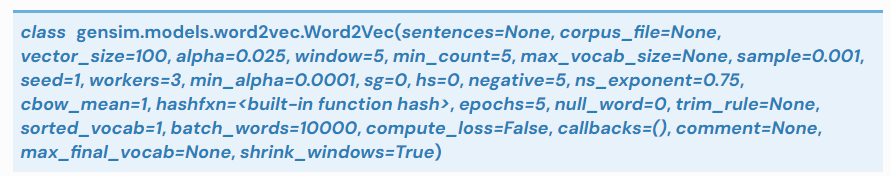

We are building model from scratch so we can choose the vector size window size 


more epochs means better results


In [4]:
messages = pd.read_csv(r"C:\Users\saksh\Desktop\Code\PY ML DL\NLP\26-CompleteNLP For Machine Learning\Practicals\SpamClassifier-master\smsspamcollection\SMSSpamCollection", sep='\t', names=['label', 'message'])


lets remove stopwords from this and understand how for each word  this word 2 vec will get created that means im taking every word in this review and applying lemmatization

In [5]:
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus.append(review)
corpus

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s',
 'u dun say so early hor u c already then say',
 'nah i don t think he go to usf he life around here though',
 'freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv',
 'even my brother is not like to speak with me they treat me like aid patent',
 'a per your request melle melle oru minnaminunginte nurungu vettam ha been set a your callertune for all caller press to copy your friend callertune',
 'winner a a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hour only',
 'had your mobile month or more u r entitled to update to the latest colour mobile with camera for free call the mobile up

In [7]:
words = []
for sent in corpus:
    words.append(simple_preprocess(sent))
words

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'in',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'to',
  'to',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply',
  'over'],
 ['dun', 'say', 'so', 'early', 'hor', 'already', 'then', 'say'],
 ['nah',
  'don',
  'think',
  'he',
  'go',
  'to',
  'usf',
  'he',
  'life',
  'around',
  'here',
  'though'],
 ['freemsg',
  'hey',
  'there',
  'darling',
  'it',
  'been',
  'week',
  'now',
  'and',
  'no',
  'word',
  'back',
  'like',
  'some',
  'fun',
  'you',
  'up',
  'for',
  'it',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'to',
  'send',
  'to',
  'rcv'],
 ['even',
  'my',
  'brother',
  'is',
  'not',
  'like',
  'to',
  'spea

In [8]:
model = Word2Vec(sentences=words, vector_size=100, window=5, min_count=1, workers=4)

In [9]:
# Average Word2Vec function
def avg_word2vec(doc):
    # Remove out-of-vocabulary words
    words = [word for word in doc if word in model.wv.index_to_key]
    if len(words) == 0:
        return np.zeros(model.vector_size)  # Ensure the size matches
    return np.mean([model.wv[word] for word in words], axis=0)

In [13]:
X = []
for doc in tqdm(words, desc="Processing documents"):
    X.append(avg_word2vec(doc))

X = np.array(X)
X[0]

Processing documents: 100%|██████████| 5572/5572 [00:00<00:00, 14488.60it/s]


array([-0.15633819,  0.37701517,  0.17311239, -0.04341686,  0.08760093,
       -0.58656037,  0.22196773,  0.65990055, -0.1272456 , -0.27400601,
       -0.25759193, -0.50189257, -0.13579386,  0.00642846,  0.18901068,
       -0.2613686 ,  0.04702308, -0.42842242, -0.02523676, -0.62435704,
        0.18863024,  0.21854028,  0.2778002 , -0.16592912, -0.08446136,
        0.00867261, -0.21661688, -0.15201454, -0.3876757 ,  0.05473425,
        0.44174218,  0.05172344,  0.11595833, -0.23680562, -0.16501552,
        0.36893839, -0.05311536, -0.20845099, -0.21237141, -0.54236227,
        0.12911429, -0.28787029, -0.29908472,  0.0125247 ,  0.2598801 ,
       -0.03642954, -0.19654068, -0.17720164,  0.13161367,  0.18990463,
        0.22761093, -0.31205299, -0.16900037, -0.0216014 , -0.31240761,
        0.12979858,  0.12885568,  0.00107667, -0.37647083,  0.14517932,
       -0.06367423, -0.00127626,  0.01697167, -0.13409704, -0.26006743,
        0.28982759,  0.12677443,  0.21265882, -0.47415277,  0.37

In [17]:
y = messages['label']
print(y)
y = pd.get_dummies(y)
print(y)
y = y.iloc[:, 0].values
print(y)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object
        ham   spam
0      True  False
1      True  False
2     False   True
3      True  False
4      True  False
...     ...    ...
5567  False   True
5568   True  False
5569   True  False
5570   True  False
5571   True  False

[5572 rows x 2 columns]
[ True  True False ...  True  True  True]


In [19]:
df = pd.DataFrame(X)
df['Output'] = y
df = df.dropna()
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Output
0,-0.156338,0.377015,0.173112,-0.043417,0.087601,-0.586560,0.221968,0.659901,-0.127246,-0.274006,...,0.121406,0.012915,0.016595,0.659139,0.217117,0.178651,-0.255449,0.140092,-0.049754,True
1,-0.115065,0.271423,0.119651,-0.027637,0.057868,-0.418804,0.153820,0.472530,-0.093801,-0.195860,...,0.075264,0.009507,0.011892,0.459811,0.155551,0.123945,-0.194274,0.102430,-0.035650,True
2,-0.159930,0.436521,0.214788,-0.028711,0.103155,-0.688163,0.257696,0.743013,-0.136685,-0.310787,...,0.149918,-0.000064,0.000013,0.748921,0.238779,0.193559,-0.292220,0.173869,-0.057549,False
3,-0.227571,0.522104,0.235049,-0.053862,0.114747,-0.812689,0.302639,0.922103,-0.183915,-0.380784,...,0.156347,0.014169,0.028268,0.910859,0.306472,0.255448,-0.363420,0.192140,-0.064345,True
4,-0.230876,0.532635,0.249437,-0.065104,0.133151,-0.836581,0.313403,0.956241,-0.191371,-0.395344,...,0.159261,0.018580,0.033020,0.942279,0.316321,0.261102,-0.380910,0.191477,-0.072420,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,-0.225436,0.595808,0.285927,-0.052839,0.137999,-0.920421,0.346368,1.015255,-0.188617,-0.423248,...,0.202426,0.009389,0.007272,1.022827,0.326221,0.274682,-0.398199,0.231448,-0.075109,False
5568,-0.209067,0.510332,0.239031,-0.050714,0.124577,-0.808590,0.304118,0.906670,-0.181146,-0.369543,...,0.166253,0.005479,0.019871,0.906219,0.296911,0.238584,-0.366177,0.196232,-0.062913,True
5569,-0.244523,0.571299,0.258606,-0.065913,0.128780,-0.881053,0.329950,1.004285,-0.194629,-0.418662,...,0.184760,0.019554,0.034526,0.998166,0.334389,0.275264,-0.386477,0.206447,-0.076581,True
5570,-0.240908,0.582645,0.270270,-0.061745,0.139542,-0.908279,0.339541,1.025215,-0.196766,-0.425507,...,0.187161,0.020249,0.027916,1.021960,0.340386,0.275831,-0.397812,0.212517,-0.081671,True


In [20]:
X = df.drop('Output', axis=1)
y = df['Output']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [22]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [23]:
print("Word2Vec - Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Word2Vec - Random Forest Classifier
Accuracy: 0.9650224215246637
              precision    recall  f1-score   support

       False       0.92      0.83      0.87       160
        True       0.97      0.99      0.98       955

    accuracy                           0.97      1115
   macro avg       0.94      0.91      0.93      1115
weighted avg       0.96      0.97      0.96      1115

